# Task 4


## Analysis of data


In this notebook, we are going to analyse the data from the mnist dataset. We will also train a model, make predictions and visualize the predictions after the fact.


### Importing packages and modules

In [1]:
from data_load import load_data
from matplotlib import pyplot as plt
import numpy as np
from data_prepare import prepare_data
from tensorflow import keras
from tensorflow.keras import layers
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2021-12-02 14:02:32.800189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-02 14:02:32.800240: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load data

In [2]:
x_train, y_train, x_test, y_test = load_data()

The data is split into a training and test set. Both sets contain the actual pictures (x) and the according labels (y). 

### Analyse data

In [3]:
# General information
print('Datatype =',type(x_train.dtype))
print('shape of x_train =',x_train.shape)
print('shape of y_train =',y_train.shape)
print('shape of x_test =',x_test.shape)
print('shape of y_test =',y_test.shape)

Datatype = <class 'numpy.dtype'>
shape of x_train = (60000, 28, 28)
shape of y_train = (60000,)
shape of x_test = (10000, 28, 28)
shape of y_test = (10000,)


The pictures are loaded as numpy arrays. The training set consists of 60000 pictures each of size 28x28 pixels. Each picture has a corresponding label with the true value. The test set contains 10000 pictures with same size and belonging labels. The shape already indicates that we do not have any color channels but only one value for the grey scale.

In [4]:
# Print array of first picture in training data
print('Type of pixel values =', x_train.dtype)
print('Structure of picture expressed as array:')
print(x_train[0])

Type of pixel values = uint8
Structure of picture expressed as array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0

When we look at the array of the first picture in the training set we see that the array consists of 28 rows with 28 values. This is just the representation of the 28x28 pixels in the picture. It can also be seen that each pixel has only one value ranging from 0 to 255. It basically describes the brightness of the pixel where 0 represents a black pixel and 255 a white pixel. Each pixel value is stored as an 8-bit integer which explains why the values only take values between 0 (in binary system: 00000000) and 255 (in binary system: 11111111). A more detailed explanation can be found [here](https://homepages.inf.ed.ac.uk/rbf/HIPR2/value.htm).

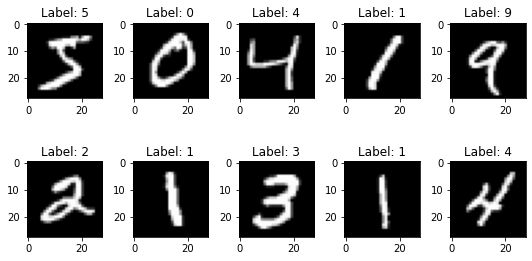

In [5]:
# Choose a sample
num = 10
images = x_train[:num]
labels = y_train[:num]

# Show pictures 
num_row = 2
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()


The pixel brigthness allows us to plot the pictures using the 'gray' colormap from pyplot. Each picture contains a handwritten number. The according labels are appended. While some of the digits are easily recognizable, others are less obvious. 

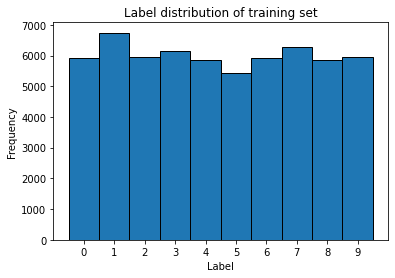

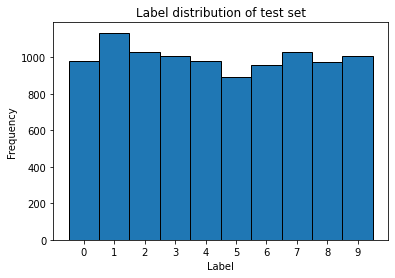

In [6]:
# Distribution of labels
bins = np.arange(11) - 0.5

# training
plt.hist(y_train, bins, edgecolor='black')
plt.xticks(range(10))
plt.title("Label distribution of training set")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

# test
plt.hist(y_test, bins, edgecolor='black')
plt.xticks(range(10))
plt.title("Label distribution of test set")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.show()

The plots indicate an approximately equal distribution of labels. In Task 2 we decided to go with accuracy as our evaluation metric for the model assuming that the labels are uniformely distributed. These plots confirm our choice. In the following steps we are now going to train our model with the same configurations which proved to be very successfull in Task 2. 

### Prepare data for model analysis

In [7]:
# prepare data 
num_classes = 10  
x_train, y_train, x_test, y_test = prepare_data(x_train, y_train, x_test, y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Data prepared


### Train Model

We train the model on the training data and with the exact same parameters used for the final run on [W&B](https://wandb.ai/fstiffler/dbs/runs/u14u7yr4?workspace=user-fstiffler) in Task 2. 

In [8]:
# set configurations
config = {
  "epochs": 5,
  "batch_size": 128,
  "validation_split": 0.1,
  "loss": "categorical_crossentropy",
  "optimizer": "adam",
  "metric": "accuracy"
}

# define input shape
input_shape = (28, 28, 1)

# define model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

# compile and train model
model.compile(loss = config['loss'],
              optimizer = config['optimizer'],
              metrics = [config['metric']])

model.fit(x_train, y_train,
          validation_data = (x_test, y_test),
          batch_size = config['batch_size'],
          epochs = config['epochs'],
          validation_split = config['validation_split'])


2021-12-02 14:02:40.507470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-02 14:02:40.507534: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-02 14:02:40.507576: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (flurin-VirtualBox): /proc/driver/nvidia/version does not exist
2021-12-02 14:02:40.508007: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-02 14:02:40.659938: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 169344000 exc

Epoch 1/5
422/422 [==============================] - 38s 88ms/step - loss: 0.3777 - accuracy: 0.8848 - val_loss: 0.0866 - val_accuracy: 0.9770
Epoch 2/5
422/422 [==============================] - 34s 80ms/step - loss: 0.1159 - accuracy: 0.9650 - val_loss: 0.0601 - val_accuracy: 0.9842
Epoch 3/5
422/422 [==============================] - 36s 86ms/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 4/5
422/422 [==============================] - 35s 83ms/step - loss: 0.0726 - accuracy: 0.9786 - val_loss: 0.0435 - val_accuracy: 0.9883
Epoch 5/5
422/422 [==============================] - 37s 87ms/step - loss: 0.0653 - accuracy: 0.9800 - val_loss: 0.0406 - val_accuracy: 0.9895


### Make predictions for test set 

The model is applied to the test set in order to evaluate the performance of the model. 

In [9]:
# Create predictions
predictions = model.predict(x_test)

### Analyse predictions

Now we are going to analyse the performance of the model on the test set. 

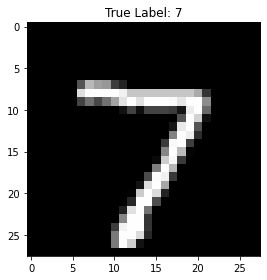

Model prediction softmax: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Final prediction (label with maximal probability): 7


In [10]:
# Print prediction and actual output for first test set picture 

plt.imshow(x_test[0], cmap='gray')
plt.title('True Label: {}'.format(np.argmax(y_test[0])))
plt.tight_layout()
plt.show()

print("Model prediction softmax:", np.round(predictions[0], 2))
print("Final prediction (label with maximal probability):", np.argmax(predictions[0]))

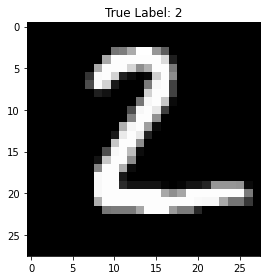

Model prediction softmax: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Final prediction (label with maximal probability): 2


In [11]:
# Print prediction and actual output for second test set picture 

plt.imshow(x_test[1], cmap='gray')
plt.title('True Label: {}'.format(np.argmax(y_test[1])))
plt.tight_layout()
plt.show()

print("Model prediction softmax:", np.round(predictions[1], 2))
print("Final prediction (label with maximal probability):", np.argmax(predictions[1]))

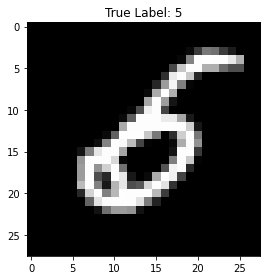

Model prediction softmax: [0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]
Final prediction (label with maximal probability): 6


In [12]:
# Print prediction and actual output for random test set picture 
n = random.randint(0,10000)

plt.imshow(x_test[n], cmap='gray')
plt.title('True Label: {}'.format(np.argmax(y_test[n])))
plt.tight_layout()
plt.show()

print("Model prediction softmax:", np.round(predictions[n], 2))
print("Final prediction (label with maximal probability):", np.argmax(predictions[n]))

From the example cases above it is visible that the model assigns each picture a softmax list. Each element in the list represents the probability that a certain digit is actually present on the picture. The first element expresses the probability that a 0 is present, the second element is the probability that 1 is present and so forth. The digit which is assigned the highest probability is our final prediction. 

In [13]:
# Model accuracy 
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Test loss: 0.036290060728788376
Test accuracy: 0.9876999855041504


The categorical crossentropy loss is minimized to 0.04 on our test data. The accuracy is almost 99%. This means our model predicts 99 out of 100 pictures correctly. In the next step we want to create a confusion matrix. For this purpose we have to create a list with actual and predicted values for each picture in the test set.

In [14]:
# Create list of actual and predicted outputs
actual = np.argmax(y_test, axis=1)
print("20 first, actual values:   ", actual[0:20])
preds = np.argmax(predictions, axis=1)
print("20 first, predicted values:", preds[0:20])

20 first, actual values:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
20 first, predicted values: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4]


Now that we have the list we can create the confusion matrix. 

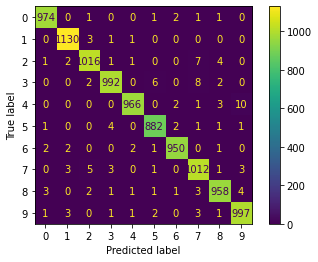

In [15]:
# Create confusion matrix
cm = confusion_matrix(actual, preds, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The confusion matrix shows the predicted values on the x-axis and the actual values on the y-axis. The diagonal line shows how many times a picture with a certain digit on it was correclty labelled and that for each digit individually. All the off-diagonal numbers show how often pictures where incorrectly labelled for each possible combination of digits. For example, we see that ten pictures of digit four were incorrectly labeled with digit nine. We also see that digit three was often mistaken for digit seven by the model. On the other end, a lot of digits where never confused with each other by the model. 

### Conclusion

In this jupyter notebook we showed how our data is structured and what the characteristics of the data is. We also evaluated the performance of our model and tried to visualize that as well. 